In [1]:
import tensorflow as tf
import numpy as np
import Set_Gaussian_Data as data
import matplotlib.pyplot as plt
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
#load input data for gaussian
training = data.create_training_set(1000, 100) #outputs an array of x_vals, mean values, and sigma values respectively
x_train = training[0] 
y_train = training[1]  
z_train = training[2] 
y_train = np.vstack((y_train, z_train)) #compile training mean and standard deviation into single data structure
y_train = y_train.T #first column as mean, second column as sd

testing = data.create_training_set(300, 100)
x_test = testing[0] 
y_test = testing[1] 
z_test = testing[2] 
y_test = np.vstack((y_test, z_test)) #compile test mean and standard deviation into single data structure 
y_test = y_test.T



In [36]:
#set layers
model = tf.keras.models.Sequential() #feed forward
#input layer: 21 different x values to represent the gaussian function
model.add(tf.keras.layers.Input(100,)) 
#hidden layers (2): 
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
#output layer:
model.add(tf.keras.layers.Dense(2,))


In [37]:
#optimize
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 90) #90 epochs minimizes the difference between test and training and testing cost


Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0294 - accuracy: 0.7810
Epoch 2/90
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0217 - accuracy: 0.9210
Epoch 3/90
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0089 - accuracy: 0.8980
Epoch 4/90
1000/1000 [==============================] - 0s 130us/sample - loss: 0.0043 - accuracy: 0.9430
Epoch 5/90
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0014 - accuracy: 0.9540
Epoch 6/90
1000/1000 [==============================] - 0s 130us/sample - loss: 0.0012 - accuracy: 0.9510
Epoch 7/90
1000/1000 [==============================] - 0s 130us/sample - loss: 0.0047 - accuracy: 0.9550
Epoch 8/90
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0020 - accuracy: 0.9480
Epoch 9/90
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0014 - accuracy: 0.9520
Epoch 10/90
1000/1000 [===

1000/1000 [==============================] - 0s 262us/sample - loss: 1.1191e-05 - accuracy: 0.9960
Epoch 76/90
1000/1000 [==============================] - 0s 147us/sample - loss: 1.1998e-05 - accuracy: 0.9960
Epoch 77/90
1000/1000 [==============================] - 0s 143us/sample - loss: 1.2957e-05 - accuracy: 0.9970
Epoch 78/90
1000/1000 [==============================] - 0s 143us/sample - loss: 1.1197e-05 - accuracy: 0.9970
Epoch 79/90
1000/1000 [==============================] - 0s 144us/sample - loss: 1.0709e-05 - accuracy: 0.9970
Epoch 80/90
1000/1000 [==============================] - 0s 145us/sample - loss: 1.0567e-05 - accuracy: 0.9970
Epoch 81/90
1000/1000 [==============================] - 0s 160us/sample - loss: 1.0191e-05 - accuracy: 0.9980
Epoch 82/90
1000/1000 [==============================] - 0s 146us/sample - loss: 9.7258e-06 - accuracy: 0.9970
Epoch 83/90
1000/1000 [==============================] - 0s 142us/sample - loss: 1.1843e-05 - accuracy: 0.9980
Epoch 84/90
1

In [38]:
#evaluate the test set and find test loss and accuracy
results = model.evaluate(x = x_test, y = y_test)
val_loss = results[0] #loss between model and actual
val_acc = results[1] #accuracy of the model based on actual
print(val_loss, val_acc)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00043452240720701714 0.98333335


In [39]:
#saves the model data
model.save('mean_and_sd.model')
new_model = tf.keras.models.load_model('mean_and_sd.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mean_and_sd.model/assets


In [40]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test) #predicts all means and standard deviations of the x_test dataset
print("X Input Values: " + str(x_test[234]))
print("Actual Mean and SD Values: " +  str(y_test[234]))  
print("Predicted Mean and SD Values: " + str(predictions[234])) 

X Input Values: [-3.15450484e-25 -6.87050751e-24 -1.37604819e-22 -2.53434461e-21
 -4.29224890e-20 -6.68484482e-19 -9.57381354e-18 -1.26085691e-16
 -1.52698174e-15 -1.70054875e-14 -1.74153229e-13 -1.64006545e-12
 -1.42029328e-11 -1.13105074e-10 -8.28272694e-10 -5.57765700e-09
 -3.45396129e-08 -1.96684589e-07 -1.02993638e-06 -4.95949745e-06
 -2.19610017e-05 -8.94239442e-05 -3.34844138e-04 -1.15297206e-03
 -3.65074978e-03 -1.06299826e-02 -2.84623167e-02 -7.00801688e-02
 -1.58674535e-01 -3.30374512e-01 -6.32547343e-01 -1.11369621e+00
 -1.80313253e+00 -2.68457634e+00 -3.67545466e+00 -4.62736317e+00
 -5.35726715e+00 -5.70348397e+00 -5.58372922e+00 -5.02684710e+00
 -4.16154127e+00 -3.16810770e+00 -2.21785359e+00 -1.42775277e+00
 -8.45201679e-01 -4.60102819e-01 -2.30322646e-01 -1.06024343e-01
 -4.48809190e-02 -1.74704904e-02 -6.25367998e-03 -2.05851205e-03
 -6.23100897e-04 -1.73440510e-04 -4.43945758e-05 -1.04495234e-05
 -2.26177946e-06 -4.50185220e-07 -8.23985202e-08 -1.38686694e-08
 -2.14653

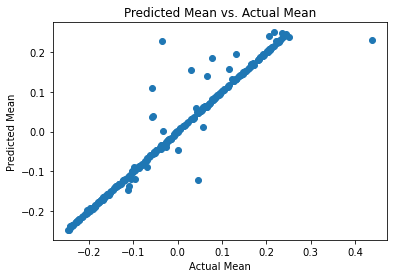

In [41]:
predictions = predictions.T
y_test = y_test.T
plt.scatter(predictions[0],y_test[0]) #mean
plt.title('Predicted Mean vs. Actual Mean')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.show() 

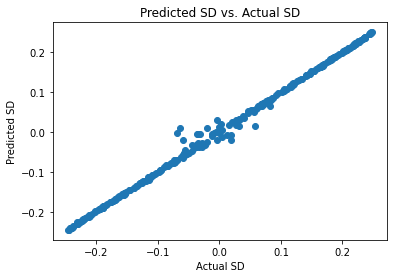

In [42]:
plt.scatter(predictions[1],y_test[1]) #SD
plt.title('Predicted SD vs. Actual SD')
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.show()

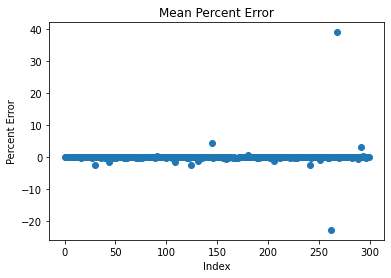

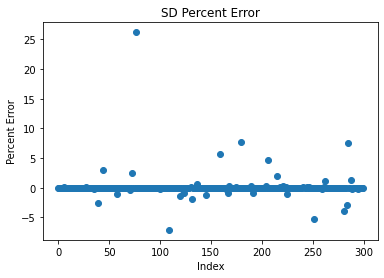

In [43]:
#percent error
plt.scatter(range(len(x_test)), (predictions[0]-y_test[0])/(y_test[0]))
plt.title('Mean Percent Error')
plt.xlabel('Index')
plt.ylabel('Percent Error')
plt.show()
plt.scatter(range(len(x_test)), (predictions[1]-y_test[1])/(y_test[1]))
plt.title('SD Percent Error') 
plt.xlabel('Index')
plt.ylabel('Percent Error') 
plt.show()

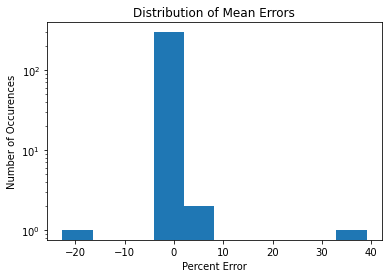

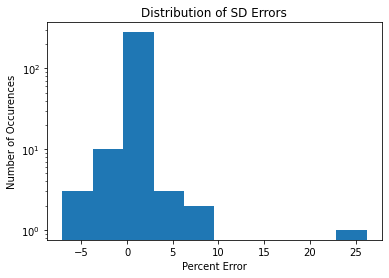

In [45]:
plt.hist((predictions[0]-y_test[0])/y_test[0])
plt.yscale('log')
plt.title('Distribution of Mean Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Percent Error')
plt.show()
plt.hist((predictions[1]-y_test[1])/y_test[1])
plt.yscale('log') 
plt.title('Distribution of SD Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Percent Error') 
plt.show() 